In [1]:
# دوره شبکه های پیچیده مدرسه علم داده - بابک تیمورپور
# HITS و PageRank مرکزیت

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Create a directed graph

In [13]:
# Create example directed graph for running PageRank algorithm
graph03 = nx.DiGraph()
for i in range(10):
    graph03.add_node(i)
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 6), (1, 7), (2, 1), (2, 3), (2, 7), (3, 1), (3, 4), (3, 8),
         (4, 1), (4, 5), (4, 9), (5, 6), (6, 5), (7, 6), (7, 8), (8, 7), (8, 9), (9, 5)]
graph03.add_edges_from(edges)

# Print number of nodes and edges
print(graph03)

DiGraph with 10 nodes and 23 edges


#### Visualize the directed graph

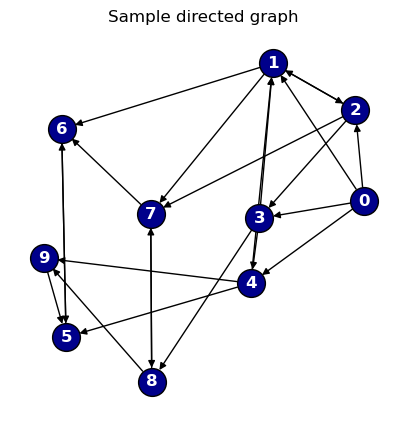

In [4]:
# plot the graph
plt.figure(figsize=(5, 5))

# Remove plot border
plt.axis('off')

# Set the random seed for layout
np.random.seed(13)
pos = nx.kamada_kawai_layout(graph03)

plt.title("Sample directed graph")

nx.draw_networkx(graph03,with_labels=True,
                 node_size=400,
                 font_color="white", font_size=12,
                 node_color="darkblue", edgecolors="black",
                 font_weight="bold")
plt.show()

#### Convert directed graph to undirected graph

In [14]:
# Convert the graph to an undirected graph
graph03_undirected = graph03.to_undirected()

#### visualize the undirected graph

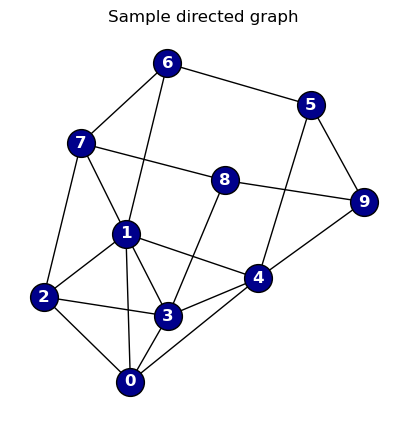

In [6]:
# plot the graph
plt.figure(figsize=(5, 5))

# Remove plot border
plt.axis('off')

pos = nx.kamada_kawai_layout(graph03_undirected)

# Set the random seed for layout
np.random.seed(2)

plt.title("Sample directed graph")

nx.draw_networkx(graph03_undirected,with_labels=True,
                 node_size=400,
                 font_color="white", font_size=12,
                 node_color="darkblue", edgecolors="black",
                 font_weight="bold")
plt.show()

#### Calculate PageRank centrality for all nodes of the graph

In [15]:
# calculate PageRank centrality for all nodes
pagerank_centrality = nx.pagerank(graph03)
# print PageRank centrality with 4 decimal digits
print({node: round(pr, 4) for node, pr in pagerank_centrality.items()})

{0: 0.015, 1: 0.0415, 2: 0.03, 3: 0.0267, 4: 0.0257, 5: 0.3615, 6: 0.3573, 7: 0.0547, 8: 0.0458, 9: 0.0418}


In [16]:
# Calculate in-degree of graph nodes
in_degree = dict(graph03.in_degree())
print(in_degree)

{0: 0, 1: 4, 2: 2, 3: 2, 4: 2, 5: 3, 6: 3, 7: 3, 8: 2, 9: 2}


In [17]:
# Calculate out-degree of graph nodes
out_degree = dict(graph03.out_degree())
print(out_degree)

{0: 4, 1: 3, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 2, 8: 2, 9: 1}


In [18]:
# Create a pandas DataFrame with PageRank, in-degree, and out-degree values
df = pd.DataFrame({'PageRank': pagerank_centrality, 'In-Degree': in_degree, 'Out-Degree': out_degree})

# Sort the DataFrame by PageRank
df = df.sort_values(by='PageRank', ascending=False)

# Print the DataFrame without the index column
print(df.to_string(index=False))

 PageRank  In-Degree  Out-Degree
 0.361496          3           1
 0.357299          3           1
 0.054724          3           2
 0.045815          2           2
 0.041766          2           1
 0.041526          4           3
 0.029953          2           3
 0.026674          2           3
 0.025745          2           3
 0.015000          0           4


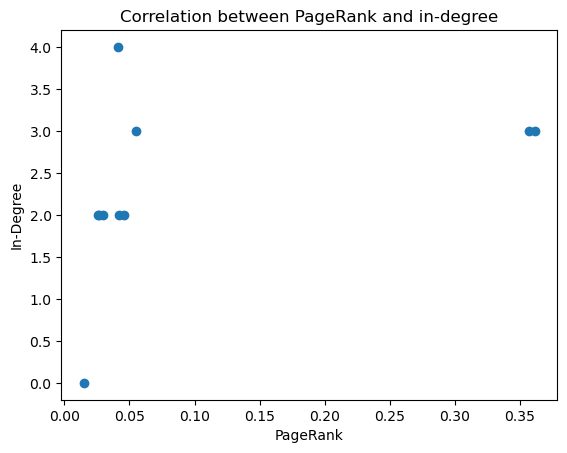

In [11]:
# Calculate Correlation between PageRank and in-degree
plt.scatter(df['PageRank'], df['In-Degree'])
plt.xlabel('PageRank')
plt.ylabel('In-Degree')
plt.title('Correlation between PageRank and in-degree')
plt.show()

#### Plot the graph with node sizes based on PageRank centrality

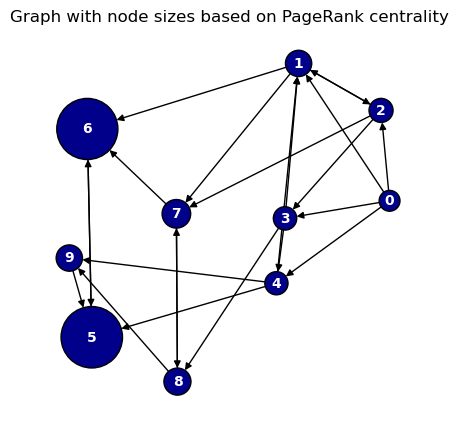

In [19]:
# Set plot area size
plt.figure(figsize=(5,5))

# Remove plot border
plt.axis('off')

# Set the layout for the graph
pos = nx.kamada_kawai_layout(graph03)

# Determine node size based on PageRank centrality
pagerankcent_arr=np.array(list(pagerank_centrality.values()))

# Set the random seed for layout
np.random.seed(13)

# Set the title of the graph
plt.title("Graph with node sizes based on PageRank centrality")

# Draw the graph
nx.draw_networkx(graph03,with_labels=True,
                 node_size=5000*(pagerankcent_arr+0.03),
                 font_color="white", font_size=10,
                 node_color="darkblue", edgecolors="black",
                 font_weight="bold")